In [46]:
import pandas as pd
import yaml
import matplotlib.pyplot as plt

# Import thermal_properties.yaml for each structure and define dataframes

In [ ]:
# The thermal_properties.yaml file was generated using the open source phonopy code. This file contains the 
# vibrational free energy and entropy for a range of temperatures.

# In this script, I calculate the total freen energy using the data in this file and internal energy calculated using
# the Vienna ab initio Simulation Package (VASP).

In [47]:
with open('/Users/fatimaalquaiti/Box/Research/Data/phonon-study/la2o3/hexagonal/thermal_properties.yaml', 'r') as file:
        documents = yaml.full_load(file)
        for item, doc in documents.items():
            if item=='thermal_properties':
                hexagonal_la2o3_thermal_properties=doc
            
df_hexagonal_la2o3 = pd.DataFrame(hexagonal_la2o3_thermal_properties)

with open('/Users/fatimaalquaiti/Box/Research/Data/phonon-study/la2o3/bixbyite/thermal_properties.yaml', 'r') as file:
        documents = yaml.full_load(file)
        for item, doc in documents.items():
            if item=='thermal_properties':
                bixbyite_la2o3_thermal_properties=doc
            
df_bixbyite_la2o3 = pd.DataFrame(bixbyite_la2o3_thermal_properties)



# Change units from kJ/mol to eV/f.u. and calculate total free energy

In [48]:

# Create a copy of the original data frames to work with
df_hexagonal_la2o3_copy = df_hexagonal_la2o3.copy()
df_bixbyite_la2o3_copy = df_bixbyite_la2o3.copy()

# Convert free energy (U) in units of kJ/mol to eV/f.u. by using the following conversions:
j_to_eV = 6.2415064799632*(10**21) # conversion from eV to J
mol_to_fu = 6.022*(10**23) # conversion from moles to fomula units
df_hexagonal_la2o3_copy['free_energy'] = df_hexagonal_la2o3['free_energy']*j_to_eV/mol_to_fu
df_bixbyite_la2o3_copy['free_energy'] = df_bixbyite_la2o3['free_energy']*j_to_eV/mol_to_fu/16 # bixbyite has 16 f.u.

# Convert entropy (S) and temperature (T) from J/K to eV/K
df_hexagonal_la2o3_copy['ST'] = df_hexagonal_la2o3['temperature']*df_hexagonal_la2o3['entropy']*j_to_eV/mol_to_fu/1000
df_bixbyite_la2o3_copy['ST'] = df_bixbyite_la2o3['temperature']*df_bixbyite_la2o3['entropy']*j_to_eV/mol_to_fu/1000/16

# Calculate total free energy where G = E - U + ST where E is the internal energy calculated using VASP
df_hexagonal_la2o3_copy['Total Free Energy'] = -41.909351 + df_hexagonal_la2o3_copy['free_energy'] - df_hexagonal_la2o3_copy['ST']
df_bixbyite_la2o3_copy['Total Free Energy'] = -42.0300656 + df_bixbyite_la2o3_copy['free_energy'] - df_bixbyite_la2o3_copy['ST']



# Identify the temperature of the phase transition

In [51]:
# Identify an energy difference between the two phases that is greater than 0.025 eV ()
phase_transition = df_hexagonal_la2o3_copy['Total Free Energy'].lt(df_bixbyite_la2o3_copy['Total Free Energy']-0.025).argmax()
temp_phase_transition = df_hexagonal_la2o3_copy['temperature'][phase_transition]

print("First instance of E Bixbyite la2o3 < E hexagonal la2o3 is at",temp_phase_transition ,"K")
print("The total free energies are:")
print("Bixbyite =",df_bixbyite_la2o3_copy['Total Free Energy'][phase_transition],"eV/f.u.")
print("Hexagonal =",df_hexagonal_la2o3_copy['Total Free Energy'][phase_transition],"eV/f.u.")


First instance of E Bixbyite la2o3 < E hexagonal la2o3 is at 1110.0 K
The total free energies are:
Bixbyite = -47.203691139202036 eV/f.u.
Hexagonal = -47.22981094594137 eV/f.u.


# Plot Total Free Energy Hexagonal vs Bixbyite La2O3

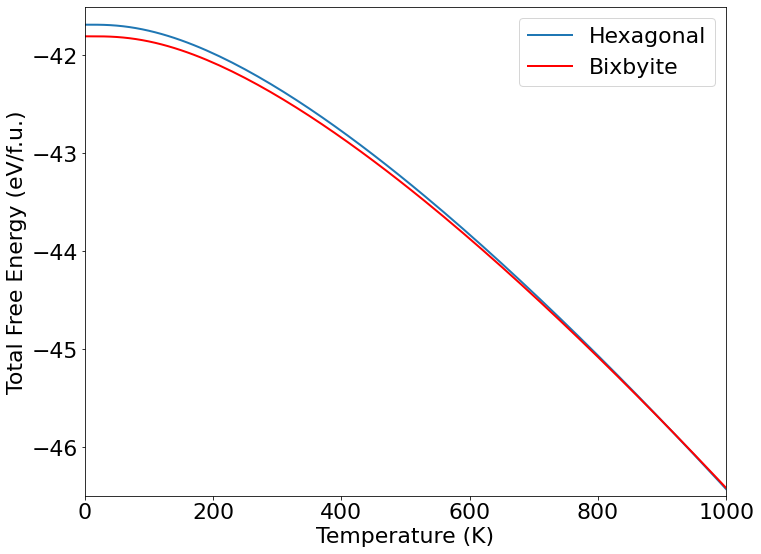

In [50]:
ax = plt.gca()

hexagonal_la2o3 = df_hexagonal_la2o3_copy.plot(figsize=(11.5,9),x="temperature", y="Total Free Energy",label='Hexagonal',linewidth=2,ax=ax)
bixbyite_la2o3 = df_bixbyite_la2o3_copy.plot(x="temperature", y="Total Free Energy",color='red',label='Bixbyite',linewidth=2,ax=ax)

ax.set_xlabel('Temperature (K)', fontsize=22)
ax.set_ylabel('Total Free Energy (eV/f.u.)', fontsize=22)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(22)

plt.xlim(0,1000)
plt.ylim(-46.5,-41.5)

plt.legend(loc=1, prop={'size': 22})
plt.show()
#plt.tight_layout()
#plt.savefig('La2O3 Free Energy.pdf')